In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()
X = data["data"]
y = data["target"]

In [3]:
pd.DataFrame(X, columns=data["feature_names"])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) / sigma

In [5]:
mdl = tf.keras.Sequential()

mdl.add(tf.keras.layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],)))
mdl.add(tf.keras.layers.Dense(32, activation = "relu"))
mdl.add(tf.keras.layers.Dense(16, activation = "relu"))
mdl.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [6]:
mdl.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history = mdl.fit(X_train,y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 3s 3ms/step - loss: 0.5740 - accuracy: 0.7814
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9422
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9523
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9648
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9698
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9774
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9824
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9824
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9824
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9824


In [7]:
mdl.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9883


[0.05488058924674988, 0.988304078578949]

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
y_train

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


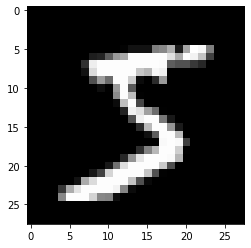

In [9]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [10]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

X_train_norm = X_train_norm[..., np.newaxis]
X_test_norm = X_test_norm[..., np.newaxis]
print(X_train_norm.shape)

(60000, 28, 28, 1)


In [27]:
mdl = tf.keras.Sequential()

mdl.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation="relu", input_shape = (28,28,1)))
mdl.add(tf.keras.layers.MaxPool2D())
mdl.add(tf.keras.layers.Dropout(0.2))
mdl.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation="relu"))
mdl.add(tf.keras.layers.MaxPool2D())
mdl.add(tf.keras.layers.Flatten())
mdl.add(tf.keras.layers.Dropout(0.2))
mdl.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1(l1 = 1e-5)))
mdl.add(tf.keras.layers.Dense(10, activation="softmax"))

mdl.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)              

In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
history = mdl.fit(X_train_norm,y_train, epochs=10, validation_split=0.1, callbacks=[early_stop])

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9924 - val_loss: 0.0580 - val_accuracy: 0.9928
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9926 - val_loss: 0.0605 - val_accuracy: 0.9923
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9938 - val_loss: 0.0642 - val_accuracy: 0.9923
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9932 - val_loss: 0.0652 - val_accuracy: 0.9915
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9936 - val_loss: 0.0580 - val_accuracy: 0.9942
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9944 - val_loss: 0.0618 - val_accuracy: 0.9930
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9944 - val_loss: 0.0661 - val_accuracy:

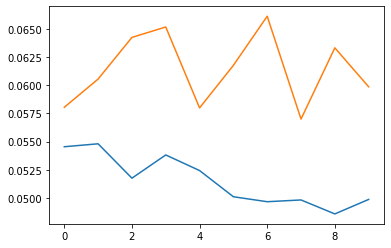

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


In [15]:
mdl.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9902


[0.039870429784059525, 0.9901999831199646]

In [38]:
df = pd.read_csv("sales.csv")
sale = df["sales"]

time_index = pd.date_range("2000-01-01", periods=sale.size, freq="MS")
df_sale = pd.DataFrame({"ds":time_index, "y": sale})

df_sale["month"] = df_sale.ds.dt.month
df_sale.month = df_sale.month.astype("str")
df_sale.drop("ds", axis = 1, inplace = True)
df_sale = pd.get_dummies(df_sale)
df_sale

df_sale["y"] = (df_sale["y"] -df_sale["y"].mean())/df_sale["y"].std()
df_sale

,y,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,-1.785054,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.804376,0,0,0,0,1,0,0,0,0,0,0,0
2,-1.575102,0,0,0,0,0,1,0,0,0,0,0,0
3,-1.534513,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.162902,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.982108,0,0,0,0,0,0,0,0,0,0,1,0
188,1.812576,0,0,0,0,0,0,0,0,0,0,0,1
189,1.812576,0,1,0,0,0,0,0,0,0,0,0,0
190,1.337225,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
def prepare_data(data, lag = 2, offset = 2):
    X = []
    y = []
    for i in range(len(data)-lag-offset + 1):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag+ offset -1,0])
    
    return np.array(X), np.array(y)

X, y = prepare_data(df_sale.values, lag = 12, offset = 12)
print(X.shape)

X_train = X[:-12]
X_test = X[-12:]
y_train = y[:-12]
y_test = y[-12:]
print(X_train.shape)


(169, 12, 13)
(157, 12, 13)


In [59]:
mdl = tf.keras.Sequential()
mdl.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu", input_shape = (X_train.shape[1:])))
mdl.add(tf.keras.layers.Dropout(0.2))
mdl.add(tf.keras.layers.LSTM(64))
mdl.add(tf.keras.layers.Dropout(0.2))
mdl.add(tf.keras.layers.Dense(32, activation="relu"))
mdl.add(tf.keras.layers.Dense(16, activation="relu"))
mdl.add(tf.keras.layers.Dense(1))

mdl.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 64)            2560      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_42 (Dense)             (None, 1)               

In [61]:

mdl.compile(optimizer="adam", loss = "mse", metrics=["mape"])
history = mdl.fit(X_train,y_train, epochs=1000, verbose=0)
mdl.evaluate(X_train,y_train)
mdl.evaluate(X_test,y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1233 - mape: 15.4468


[0.12328729033470154, 15.446795463562012]